In [1]:
#This script uses the SerpAPI to search for coffee shops in New York City using Yelp.
#It retrieves the search results and prints the names and addresses of the coffee shops found.
##Make sure to set up your environment variables and install the required libraries before running this script.
from serpapi import GoogleSearch
from dotenv import load_dotenv
import os
load_dotenv()

serpapi_api_key = os.getenv("SERPAPI_API_KEY")
params = {
  "engine": "yelp",
  "find_desc": "Coffee",
  "find_loc": "New York, NY, USA",
  "api_key": serpapi_api_key
}

search = GoogleSearch(params)
results = search.get_dict()
organic_results = results["organic_results"]

In [ ]:
print(organic_results)

In [3]:

import json 
import pandas as pd



# Extracting place_ids
place_ids = [entry['place_ids'] for entry in organic_results]

# Creating DataFrame
df = pd.DataFrame(place_ids, columns=['Primary Place ID', 'Secondary Place ID'])

print(df)




         Primary Place ID                   Secondary Place ID
0  SZXOfQbLyF3C5GwYBj6VvA            saltwater-coffee-new-york
1  OiCXI-fkb5nyYyfH3AxAOg         kaigo-coffee-room-brooklyn-4
2  bJDU8KNLQMrZG0Ngs4AY0w                   le-phin-new-york-2
3  -2UtjTxrt1Xzd-HPsLJ7mA                    butler-brooklyn-2
4  h4WYxfCESFdkL7lLGj6o5g       ten-thousand-coffee-new-york-4
5  d2y35lqplnZvK0cbMWz7xQ                    kijitora-brooklyn
6  CBmrwh7jHn88M4v8Q9Qyyg          white-noise-coffee-brooklyn
7  KzQFDAXAi3ZwphAsIYgCvA       ten-thousand-coffee-new-york-3
8  36H0Jh9x3mx5Wk9AaAyoog  coffee-project-new-york-new-york-18
9  dXK2R-3ECPqXVgjvGlV8Cw        zibetto-espresso-bar-new-york


In [4]:
# Save the dataframe to  a list to loop through the place_ids
place_ids_list = df['Primary Place ID'].tolist()
print(place_ids_list)

['SZXOfQbLyF3C5GwYBj6VvA', 'OiCXI-fkb5nyYyfH3AxAOg', 'bJDU8KNLQMrZG0Ngs4AY0w', '-2UtjTxrt1Xzd-HPsLJ7mA', 'h4WYxfCESFdkL7lLGj6o5g', 'd2y35lqplnZvK0cbMWz7xQ', 'CBmrwh7jHn88M4v8Q9Qyyg', 'KzQFDAXAi3ZwphAsIYgCvA', '36H0Jh9x3mx5Wk9AaAyoog', 'dXK2R-3ECPqXVgjvGlV8Cw']


In [ ]:
## Loop through the place_ids and get reviews for each place_id
## store the reviews in a dictionary with place_id as the key and reviews as the value
All_Reviews = {}
for place_id in place_ids_list:
    params = {
        "engine": "yelp_reviews",
        "place_id": place_id,
        "key": serpapi_api_key
    }
    search = GoogleSearch(params)
    results = search.get_dict()

    All_Reviews[place_id] = results.get("reviews", [])


In [6]:



normalized_data = []
# Loop through all places and their associated reviews

for place_id, reviews in All_Reviews.items():
    for review in reviews:
        normalized_data.append({
            "Place ID": place_id,
            "Date": review.get("date"),
            "Reviewer Name": review.get("user", {}).get("name"),
            "Comment": review.get("comment", {}).get("text"),
            "Rating": review.get("rating"),
            "Business Name": results.get("search_information", {}).get("business")  # Assuming same for all reviews
        })

# Convert list to DataFrame
df = pd.DataFrame(normalized_data)

# Display the DataFrame
df.head()

,Place ID,Date,Reviewer Name,Comment,Rating,Business Name
0,SZXOfQbLyF3C5GwYBj6VvA,2025-01-29T01:38:38Z,LoiLoi F.,"What a cute, small, cozy cafe! \n\nIt was our ...",3,Zibetto Espresso Bar
1,SZXOfQbLyF3C5GwYBj6VvA,2025-01-24T18:38:58Z,Alivia T.,"Hot Matcha Latte was frothy! I got mine to go,...",5,Zibetto Espresso Bar
2,SZXOfQbLyF3C5GwYBj6VvA,2024-12-14T18:26:34Z,Elizabeth L.,This cafe is cute! The staff is friendly and t...,5,Zibetto Espresso Bar
3,SZXOfQbLyF3C5GwYBj6VvA,2025-01-02T16:54:51Z,Doen L.,This place is so cute! The service was excelle...,5,Zibetto Espresso Bar
4,SZXOfQbLyF3C5GwYBj6VvA,2025-02-13T16:24:18Z,Blaise H.,Worst coffee I've ever had. Had to throw it ou...,1,Zibetto Espresso Bar


In [7]:
# change the data types of the columns to appropriate types
df["Comment"] = df["Comment"].astype(str)
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].dt.strftime('%Y-%m-%d')
#columns = ["Place ID", "Business Name", "Date", "Reviewer Name", "Comment", "Rating"]
#df = df[columns]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Place ID       464 non-null    object
 1   Date           464 non-null    object
 2   Reviewer Name  464 non-null    object
 3   Comment        464 non-null    object
 4   Rating         464 non-null    int64 
 5   Business Name  464 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.9+ KB


,Place ID,Date,Reviewer Name,Comment,Rating,Business Name
0,SZXOfQbLyF3C5GwYBj6VvA,2025-01-29,LoiLoi F.,"What a cute, small, cozy cafe! \n\nIt was our ...",3,Zibetto Espresso Bar
1,SZXOfQbLyF3C5GwYBj6VvA,2025-01-24,Alivia T.,"Hot Matcha Latte was frothy! I got mine to go,...",5,Zibetto Espresso Bar
2,SZXOfQbLyF3C5GwYBj6VvA,2024-12-14,Elizabeth L.,This cafe is cute! The staff is friendly and t...,5,Zibetto Espresso Bar
3,SZXOfQbLyF3C5GwYBj6VvA,2025-01-02,Doen L.,This place is so cute! The service was excelle...,5,Zibetto Espresso Bar
4,SZXOfQbLyF3C5GwYBj6VvA,2025-02-13,Blaise H.,Worst coffee I've ever had. Had to throw it ou...,1,Zibetto Espresso Bar


In [8]:
#Import vader sentiment analysis tool
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hebra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer as sia
from tqdm.notebook import tqdm
# Apply the sentiment analysis to the 'Comment' column
#returns a dataframe with the columns Negative, Neutral, Positive, and Compound
#Compound is the overall sentiment score
df[['Negative','Neutral','Postive','Compound']] = df['Comment'].apply(lambda x: pd.Series(sia().polarity_scores(x)))


In [10]:
df.head()
#{'neg': 0.027, 'neu': 0.756, 'pos': 0.217, 'co...

,Place ID,Date,Reviewer Name,Comment,Rating,Business Name,Negative,Neutral,Postive,Compound
0,SZXOfQbLyF3C5GwYBj6VvA,2025-01-29,LoiLoi F.,"What a cute, small, cozy cafe! \n\nIt was our ...",3,Zibetto Espresso Bar,0.050,0.804,0.146,0.6093
1,SZXOfQbLyF3C5GwYBj6VvA,2025-01-24,Alivia T.,"Hot Matcha Latte was frothy! I got mine to go,...",5,Zibetto Espresso Bar,0.000,0.844,0.156,0.7650
2,SZXOfQbLyF3C5GwYBj6VvA,2024-12-14,Elizabeth L.,This cafe is cute! The staff is friendly and t...,5,Zibetto Espresso Bar,0.033,0.741,0.227,0.9557
3,SZXOfQbLyF3C5GwYBj6VvA,2025-01-02,Doen L.,This place is so cute! The service was excelle...,5,Zibetto Espresso Bar,0.000,0.638,0.362,0.9777
4,SZXOfQbLyF3C5GwYBj6VvA,2025-02-13,Blaise H.,Worst coffee I've ever had. Had to throw it ou...,1,Zibetto Espresso Bar,0.306,0.647,0.047,-0.9302


In [11]:
# The 'Compound' score is a normalized score between -1 and 1
# Convert the compound score to a rating scale of 1-5, through a custom function

def sentiment_to_rating(compound):
    if compound <= -0.6:
        return 1
    elif compound <= -0.2:
        return 2
    elif compound <= 0.2:
        return 3
    elif compound <= 0.6:
        return 4
    else:
        return 5
df['Sentiment Rating'] = df['Compound'].apply(sentiment_to_rating)  
df.head()

,Place ID,Date,Reviewer Name,Comment,Rating,Business Name,Negative,Neutral,Postive,Compound,Sentiment Rating
0,SZXOfQbLyF3C5GwYBj6VvA,2025-01-29,LoiLoi F.,"What a cute, small, cozy cafe! \n\nIt was our ...",3,Zibetto Espresso Bar,0.050,0.804,0.146,0.6093,5
1,SZXOfQbLyF3C5GwYBj6VvA,2025-01-24,Alivia T.,"Hot Matcha Latte was frothy! I got mine to go,...",5,Zibetto Espresso Bar,0.000,0.844,0.156,0.7650,5
2,SZXOfQbLyF3C5GwYBj6VvA,2024-12-14,Elizabeth L.,This cafe is cute! The staff is friendly and t...,5,Zibetto Espresso Bar,0.033,0.741,0.227,0.9557,5
3,SZXOfQbLyF3C5GwYBj6VvA,2025-01-02,Doen L.,This place is so cute! The service was excelle...,5,Zibetto Espresso Bar,0.000,0.638,0.362,0.9777,5
4,SZXOfQbLyF3C5GwYBj6VvA,2025-02-13,Blaise H.,Worst coffee I've ever had. Had to throw it ou...,1,Zibetto Espresso Bar,0.306,0.647,0.047,-0.9302,1


In [12]:
# Created a function to match the ratings from the reviews with the sentiment ratings
# If the rating from the review matches the sentiment rating, it is a match, otherwise it is a mismatch
def match_ratings(row):
    if row['Rating'] == row['Sentiment Rating']:
        return 'Match'
    else:
        return 'Mismatch'
df['Rating Match'] = df.apply(match_ratings, axis=1)
df.head()

,Place ID,Date,Reviewer Name,Comment,Rating,Business Name,Negative,Neutral,Postive,Compound,Sentiment Rating,Rating Match
0,SZXOfQbLyF3C5GwYBj6VvA,2025-01-29,LoiLoi F.,"What a cute, small, cozy cafe! \n\nIt was our ...",3,Zibetto Espresso Bar,0.050,0.804,0.146,0.6093,5,Mismatch
1,SZXOfQbLyF3C5GwYBj6VvA,2025-01-24,Alivia T.,"Hot Matcha Latte was frothy! I got mine to go,...",5,Zibetto Espresso Bar,0.000,0.844,0.156,0.7650,5,Match
2,SZXOfQbLyF3C5GwYBj6VvA,2024-12-14,Elizabeth L.,This cafe is cute! The staff is friendly and t...,5,Zibetto Espresso Bar,0.033,0.741,0.227,0.9557,5,Match
3,SZXOfQbLyF3C5GwYBj6VvA,2025-01-02,Doen L.,This place is so cute! The service was excelle...,5,Zibetto Espresso Bar,0.000,0.638,0.362,0.9777,5,Match
4,SZXOfQbLyF3C5GwYBj6VvA,2025-02-13,Blaise H.,Worst coffee I've ever had. Had to throw it ou...,1,Zibetto Espresso Bar,0.306,0.647,0.047,-0.9302,1,Match


In [15]:
df.to_csv('coffee_shops_reviews.csv', index=False)

In [16]:
import matplotlib.pyplot as plt

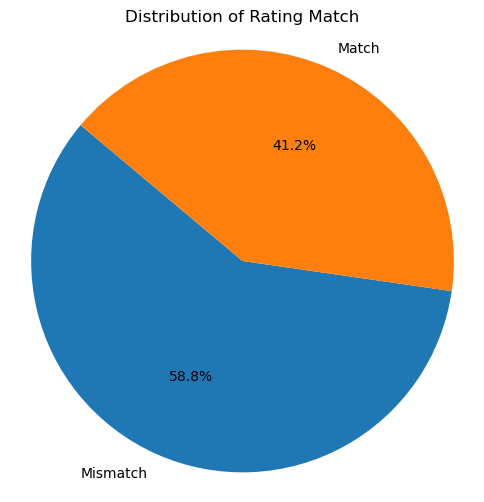

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(df['Rating Match'].value_counts(), labels=df['Rating Match'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Match')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

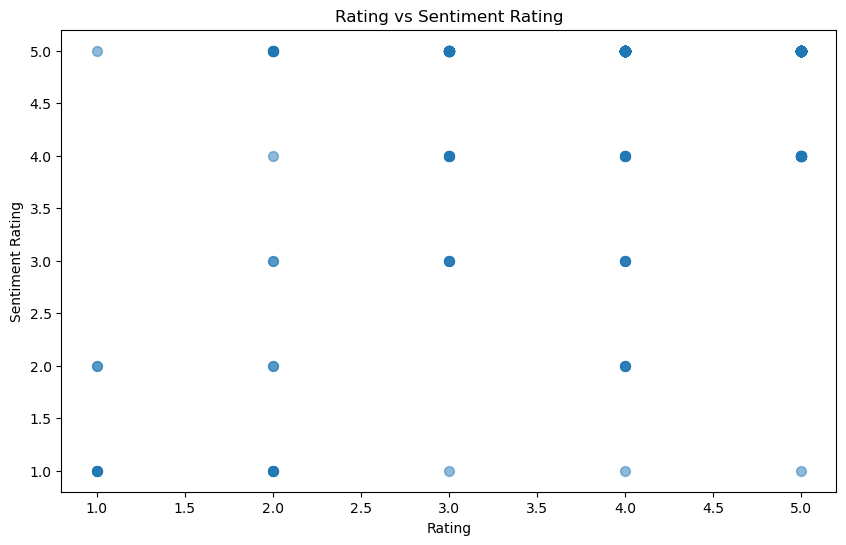

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'],df['Sentiment Rating'], alpha=0.5, s= 50)
plt.title('Rating vs Sentiment Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Rating')
plt.show()